In [1]:
data_anh_huy='/data_science/data_science/data/v1/fprint/fprint_19052022/fprint_huy/huy_thin_labeled/NONE'
data_anh_git='/data_science/data_science/data/v1/fprint/fprint_19052022/fprint_git/git_thin_labeled/NONE'
data_anh_tri='/data_science/data_science/data/v1/fprint/fprint_19052022/fprint_tri/tri_thin_labeled/NONE'

In [2]:
import cv2
import os
from os import listdir
from PIL import Image
import numpy as np
data = [data_anh_huy,data_anh_git,data_anh_tri]
img_list=[]
for datasource in data:
    list_files = os.listdir(datasource)
    for m_file in list_files:
        #img_list.append(np.asarray(Image.open(datasource+"/"+m_file)))
        img_list.append(cv2.imread(datasource+"/"+m_file, cv2.IMREAD_GRAYSCALE))
        #print(cv2.imread(datasource+"/"+m_file,0))


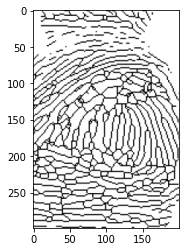

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img_list[0][:,50:250],cmap='gray')
plt.show()

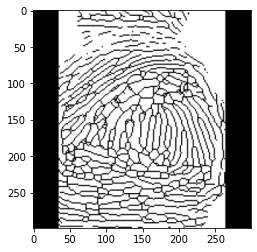

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img_list[0], cmap='gray')
plt.show()

In [5]:
new_img_list=[]
for img in img_list:
    new_img_list.append(img.reshape(-1))

In [6]:
hong = img_list[0].reshape(-1)
hong = np.array([0, 0, 1, 3, 1])
np.count_nonzero(hong)

3

In [7]:
list_0=[]
list_1=[]
for img in new_img_list:
    count_1 = np.count_nonzero(img)
    count_0 = 89401 - count_1 # 299*299 = 89401
#     count_0=0
#     count_1=0
#     for m_value in img:
#         if m_value ==0:
#             count_0+=1
#         else:
#             count_1+=1
    list_0.append(count_0)
    list_1.append(count_1)

In [8]:
import os
from os import listdir
img_name_list=[]
data_anh_huy='/data_science/data_science/data/v1/fprint/fprint_19052022/fprint_huy/huy_thin_labeled/NONE'
data_anh_git='/data_science/data_science/data/v1/fprint/fprint_19052022/fprint_git/git_thin_labeled/NONE'
data_anh_tri='/data_science/data_science/data/v1/fprint/fprint_19052022/fprint_tri/tri_thin_labeled/NONE'
data = [data_anh_huy,data_anh_git,data_anh_tri]
for datasource in data:
    list_files = os.listdir(datasource)
    img_name_list.extend(list_files)

In [9]:
import pandas as pd
data = pd.DataFrame([img_name_list,list_0,list_1]) #Each list would be added as a row
data = data.transpose() #To Transpose and make each rows as columns
data.columns=['image_name','pixel_value_0','pixel_value_1'] #Rename the columns
data.head()

image_name pixel_value_0 pixel_value_1
0   image_left (312).png         24953         64448
1  image_right (272).png         23018         66383
2  image_right (266).png         20850         68551
3  image_right (296).png         27842         61559
4   image_left (143).png         20744         68657

In [10]:
data['value_0_percentage'] = data.pixel_value_0.apply(lambda x: round(x/(299*299)*100))
data['value_else_percentage'] = data.pixel_value_1.apply(lambda x: round(x/(299*299)*100))

In [11]:
data

image_name pixel_value_0 pixel_value_1  value_0_percentage  \
0     image_left (312).png         24953         64448                  28   
1    image_right (272).png         23018         66383                  26   
2    image_right (266).png         20850         68551                  23   
3    image_right (296).png         27842         61559                  31   
4     image_left (143).png         20744         68657                  23   
..                     ...           ...           ...                 ...   
778      Left_image086.png         19451         69950                  22   
779     Right_image054.png         13083         76318                  15   
780      Left_image083.png         20564         68837                  23   
781    Right_image0105.png         18808         70593                  21   
782     Left_image0187.png         19831         69570                  22   

     value_else_percentage  
0                       72  
1                       74  
2                       77  
3                       69  
4                       77  
..                     ...  
778                     78  
779                     85  
780                     77  
781                     79  
782                     78  

[783 rows x 5 columns]

In [12]:
data.value_0_percentage.describe()

count    783.000000
mean      13.453384
std       12.352457
min        0.000000
25%        4.000000
50%        7.000000
75%       23.000000
max       62.000000
Name: value_0_percentage, dtype: float64

In [13]:
data.value_else_percentage.describe()

count    783.000000
mean      86.546616
std       12.352457
min       38.000000
25%       77.000000
50%       93.000000
75%       96.000000
max      100.000000
Name: value_else_percentage, dtype: float64

<AxesSubplot:>

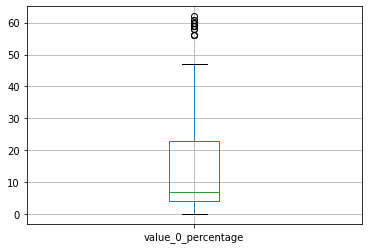

In [14]:
data.boxplot(column='value_0_percentage')

<AxesSubplot:>

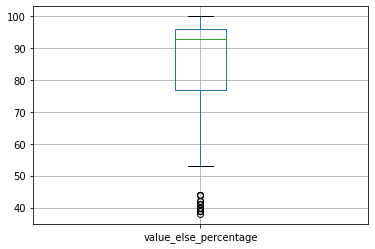

In [15]:
data.boxplot(column='value_else_percentage')